<a href="https://colab.research.google.com/github/minami1009/bio/blob/main/openmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#最初にminicondaをインストール
!wget -qnc https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local
!rm Miniconda3-latest-Linux-x86_64.sh

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2021.10.26=h06a4308_2
    - certifi==2021.10.8=py39h06a4308_2
    - cffi==1.15.0=py39hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.7.3=py39h27cfd23_1
    - conda==4.11.0=py39h06a4308_0
    - cryptography==36.0.0=py39h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1m=h7f8727e_0
    - pip==21.2.4=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - pycparser==2.21=pyhd3eb1b0_0
    - pyopenssl==21.0.0=pyhd

In [3]:
#OpenMMをconda-forgeチャンネルからインストール
!conda install -c conda-forge openmm=7.6 python=3.7 -y 

#OpenMMが使えるようにパスを通しておく
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - openmm=7.6
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            1_gnu          22 KB  conda-forge
    brotlipy-0.7.0             |py37h540881e_1004         342 KB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    c

In [ ]:
from google.colab import files

In [ ]:
#openmm-setupで準備したpythonプログラムを実行
%run run_openmm_simulation.py

Building system...
Performing energy minimization...
Equilibrating...
Simulating...


In [ ]:
#できあがったファイルをとにかくダウンロードしておく
files.download("trajectory.dcd")
files.download("log.txt")
files.download("checkpoint.chk")
files.download("system.xml")
files.download("final_state.pdbx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#ここからpytrajでtrajectoryファイルを見る
!conda install -c ambermd pytraj  --yes 2>&1 1>/dev/null

import pandas as pd
import matplotlib.pyplot as plt
import pytraj as pt
import numpy as np
import os

workDir = '/content/drive/MyDrive/'

#ローカルで作ったtrajectoryファイルを読み込むならここに入れる
#pt.iterloadの引数は1つ目がtrajectoryファイル(.dcd)、2つ目が初期状態のpdbファイル
#上で作ったtrajectoryファイルの場合は適当に1つ目の引数を変える
traj = pt.iterload('/content/drive/Othercomputers/MacBook_home/modelling/openmm/300ns/trajectory.dcd','2z70-processed.pdb')
print(traj)

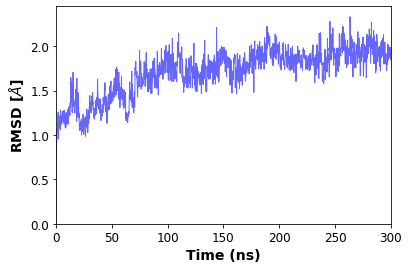

In [31]:
rmsd = pt.rmsd(traj, ref = 0, mask = "@CA")

#ここの2つの0.2は適宜変える
#今回は0.2nsごとに1500回やっているのでxlimはmax300にしている
time = len(rmsd)*0.2
time_array = np.arange(0,time,0.2)

ax = plt.plot(time_array, rmsd, alpha=0.6, color = 'blue', linewidth = 1.0)
plt.xlim(0, 300)
plt.ylim(0)

plt.xlabel("Time (ns)", fontsize = 14, fontweight = 'bold')
plt.ylabel("RMSD [$\AA$]", fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig(os.path.join(workDir, "rmsd.png"), dpi=600, bbox_inches='tight')

raw_data=pd.DataFrame(rmsd)
raw_data.to_csv(os.path.join(workDir, "rmsd.csv"))

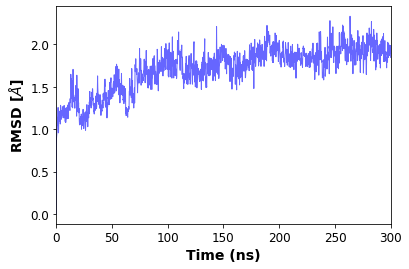